# TP - "Fusion de Données"

On considère un espace quadrillé en $n$ lignes et $m$ colonnes. 
Des capteurs surveillent un navire present dans cette zone. 
L'objectif est de fusionner les informations fournies par les capteurs à l'aide de la règle de Dempster.

Sur ce quadrillage, un ensemble de points (ou "grille") peut etre representé par un tableau de booleens 
à deux dimensions ( $n$ lignes et $m$ colonnes)

Dans notre contexte, les informations fournies par des capteurs sont des bpa, i.e. des ensembles de points auxquels la bpa associe des poids.

Informatiquement, une fonction de masse à $k$ elements focaux  decrite par deux listes: la liste $EF$ est celle des $k$ elements focaux de la bpa ( $k$ ensembles de points), la liste $p$ celle des poids correspondants

Le programme python suivant implemente les concepts de grille et de fonction de masse (en particulier de fonction de masse generée par un capteur ligne, colonne ou point). 

Nous l 'utiliserons dans la suite du TP ; vous pouvez vous familariser avec en allant à la section TODO 1

In [48]:
pip install jsonpickle

1745.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# TODO 1 : prise en main

Objectif : observer la classe bpa et les classes CapteurCol et CapteurLigne dans le module bpaGrid.py

le code qui suit travaille sur des grilles 10 lignes et 7 colonnes.

Il affiche la grille A cree par l'instruction A = zone(2,2,4,4)  et la bpa contenant un seul ensemble focal (A) de poids 1


In [49]:
from bpaGrid import CapteurCol, CapteurLigne, bpa, zone, pigshow
import numpy as np

bpa.n=10
bpa.m=7

Z=bpa()
Z.show()
print("Z correct ?", Z.isCorrect())




bpa sous normalisee
Z correct ? False


[[False False False False False False False]
 [False False False False False False False]
 [False False  True  True  True  True False]
 [False False  True  True  True  True False]
 [False False  True  True  True  True False]
 [False False  True  True  True  True False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]]


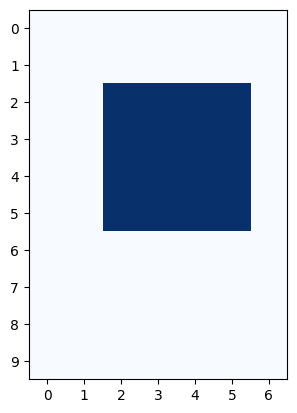

In [50]:
# creation d'une grille de largeur 4 commencant au point (2,2)

A = zone(2,2,4,4)
print(A)
pigshow(A)








Creer deux zones A1 et A2 et  la bpa m où m(A1)=0.7 et m(A2)=0.3 ; verifier que la bpa est normalisée et l'afficher

Pour ce on peut utiliser un affichage graphique (fonction  pigshow(X)) ou  directement regarder la bpa (methode bpa.show())


In [51]:
bpa.n=10
bpa.m=7

m_=bpa()
A1 = zone(1, 1, 3, 3)  
A2 = zone(5, 3, 2, 4)


# Ajouter A1 avec le poids 0.7
m_.EF.append(A1)
m_.p.append(0.7)

# Ajouter A2 avec le poids 0.3
m_.EF.append(A2)
m_.p.append(0.3)

print( m_.isCorrect())

True


1
[[False False False False False False False]
 [False False False False False False False]
 [False False  True  True  True  True False]
 [False False  True  True  True  True False]
 [False False  True  True  True  True False]
 [False False  True  True  True  True False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]]
Z correct ? True


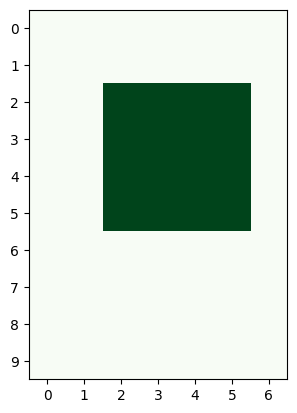

In [52]:
# ajout d'un EF de poids 1

Z.EF.append(A)
Z.p.append(1)
Z.show()
print("Z correct ?", Z.isCorrect())
pigshow(Z)

Le package contient des inscruction permettant de creer des bpa representant des informations incertaines issues de capteurs.

Explorer les deux bpa X et Y crees par les instructions CapteurCol(3,1,0.9) et CapteurLigne(2,1,0.9)

Pour ce on peut utiliser un affichage graphique (fonction  pigshow(X)) ou  directement regarder la bpa (methode bpa.show())

Combien X et Y contienent t d'element focaux ? les bpa sont elles normalisées ?

0.9
[[False False False  True False False False]
 [False False False  True False False False]
 [False False False  True False False False]
 [False False False  True False False False]
 [False False False  True False False False]
 [False False False  True False False False]
 [False False False  True False False False]
 [False False False  True False False False]
 [False False False  True False False False]
 [False False False  True False False False]]
0.09999999999999998
[[False False  True  True  True False False]
 [False False  True  True  True False False]
 [False False  True  True  True False False]
 [False False  True  True  True False False]
 [False False  True  True  True False False]
 [False False  True  True  True False False]
 [False False  True  True  True False False]
 [False False  True  True  True False False]
 [False False  True  True  True False False]
 [False False  True  True  True False False]]


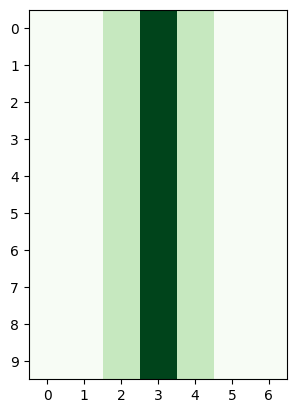

In [ ]:
X= CapteurCol(3,1,0.9)
pigshow(X)
X.show()





-> X contient 2 éléments focaux de poids 0.9 et 0.1, le bpa est donc normalisé puisque 0.9 + 0.1 = 1

0.9
[[False False False False False False False]
 [False False False False False False False]
 [ True  True  True  True  True  True  True]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]]
0.09999999999999998
[[False False False False False False False]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]]


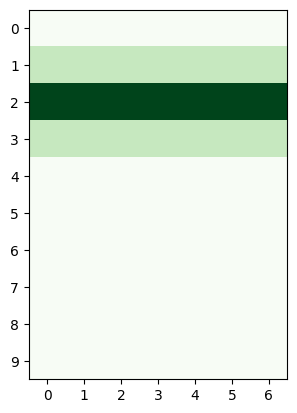

In [ ]:
Y= CapteurLigne(2,1,0.9)
Y.show()
pigshow(Y)



-> Y contient 2 éléments focaux de poids 0.9 et 0.1, le bpa est donc normalisé puisque 0.9 + 0.1 = 1

# TODO  2:

Implementer la fonctions Bel(bpa: m, grille: a),- calculer par exemple Bel(X,A) et   Bel(Y,A)   pour les   bpa  et la grille precedentes.

A titre d exemple on vous donne ci dessous une implementation de la fonction Pl


In [55]:
# a doit etre une grille
def pl(b1:bpa, a:np.ndarray):
    pl = 0
    for x in range(len(b1.EF)):
        if np.any(np.logical_and(b1.EF[x],a)):
            pl = pl + b1.p[x]
    return pl

print(pl(X,A))

1.0


In [59]:
def bel(b1: bpa, a: np.ndarray):
    s = 0
    for i in range(len(b1.EF)):
        # EF_i ⊆ a  <=>  aucun True de EF_i en dehors de a
        if not np.any(np.logical_and(b1.EF[i], np.logical_not(a))):
            s += b1.p[i]
    return s


print("Bel(X,A) =", bel(X, A))
print("Bel(Y,A) =", bel(Y, A))

Bel(X,A) = 0
Bel(Y,A) = 0


In [57]:
print(bel(X,A))

B=zone(0,0,4,10)
print(bel(X,B))

0.0
0.9


# TODO 3:

Implementer la fonction fusion(bpa: m1, bpa: m2) qui rend la bpa obtenue en fusionnant m1 et m2 par la regle de Dempster. Calculer par exemple W = fusion(X,Y) et Bel(Z,A)

In [ ]:
#implementation de la fonction fusion
def fusion(m1: bpa, m2: bpa) -> bpa:
    res = bpa()
    K = 0.0  # conflit

    for i in range(len(m1.EF)):
        for j in range(len(m2.EF)):
            inter = np.logical_and(m1.EF[i], m2.EF[j])
            mass = m1.p[i] * m2.p[j]

            if not np.any(inter):
                K += mass
            else:
                # cumuler les masses pour des intersections identiques
                merged = False
                for k in range(len(res.EF)):
                    if np.array_equal(res.EF[k], inter):
                        res.p[k] += mass
                        merged = True
                        break
                if not merged:
                    res.EF.append(inter)
                    res.p.append(mass)

    if K >= 1.0 - 1e-12:
        raise ValueError("Conflit total (K≈1), fusion indéfinie.")

    # normalisation par (1-K)
    norm = 1.0 - K
    res.p = [pk / norm for pk in res.p]
    return res
            
    
    
    

 

0.9


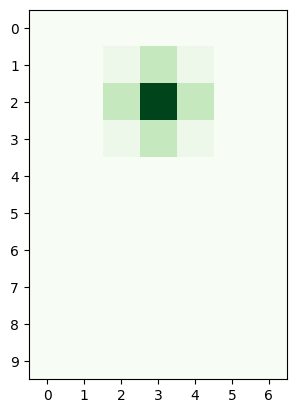

In [67]:
W=fusion(X,Y)
print(bel(W,A))
pigshow(W)


# TODO 4:

Les classes CapteurLigneFull(i,marge,fiab) et  CapteurLigneFull(i,marge,fiab) fournissent des modeles de capteurs un peu plus perfectionnés. On iamgine un protocole de test tres simple qui mesure la complexité (en temps, en espace) de la fusion en fonction du nombre de bpa à fusionner (ou un nombre de ses elements focaux).  Comment evolue le temps de calcul et le nombre d'elements focaux lorsque l'on effectue de plus en plus de fusions ?





In [63]:
from bpaGrid  import CapteurFoo,CapteurColFull, CapteurLigneFull

def test(iter:int):
    x = CapteurFoo()
    marge=3
    fiab=0.2
    for i in range(iter):
        z=CapteurColFull(i,marge,fiab)
        y=CapteurLigneFull(i,marge,fiab)
        x= fusion(x,z)
        print(len(x.EF), x.size() )
        x= fusion(x,y)
        print(len(x.EF), x.size() )
    return x

3 682
9 1966
15 3154
25 5262
35 7306
49 10174
56 11656
72 14920
117 24246
195 40266
270 55980
396 81664


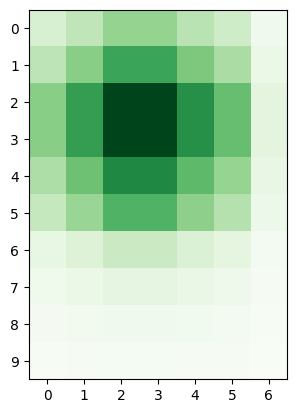

In [64]:
m=7
n=10
x=test(6)
pigshow(x)

 -> Le nombre d'éléments focaux et le temps de calcul augmentent de manière exponentielle, c'est un cas d'explosion combinatoire.


# TODO 5

En supposant que le cout d'une mission sur une zone est egal à cout(zone) =  fixe  + (size(zone) fixe / 2), et rapporte  gain (par exemple avec fixe = 100 et gain = 1000), 
implementer la fonction qui calcule l'utilité pessimiste de l'envoi d une mission sur une zone:
    
upes(nd.array,gain,fixe)

In [ ]:
def upes(m: bpa, zone_mission: np.ndarray, gain: float, fixe: float) -> float:
    # coût de la mission
    size_zone = np.sum(zone_mission) # zone_mission: La grille de la zone de mission
    cost = fixe + (size_zone * fixe / 2)
    # gain espéré (vision pessimiste basée sur la croyance)
    expected_gain = gain * bel(m, zone_mission)
    # utilité = Gain espéré - Coût
    return expected_gain - cost


# Test
gain = 1000
fixe = 100

# Utilisons la bpa W fusionnée précédemment et la zone A
utilité = upes(W, A, gain, fixe)

print(f"Croyance Bel(W, A) = {bel(W, A)}")
print(f"Utilité pessimiste pour la mission sur la zone A : {utilité}")


Croyance Bel(W, A) = 0.9
Utilité pessimiste pour la mission sur la zone A : 0.0


-> Le gain attendu de la mission est exactement égal à son coût, l'utilité est donc nulle.